Comparativa entre la variación del PIB ajustado por PPA, con el Índice de Libertad Económica en los años 2017, 2018 y 2019.


Alan J. Orce Hernández
Enero 2021


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (9,6)


# Se cargan los datos del fichero en un dataframe.
#Loading data file in a DataFrame
data = pd.read_csv("data/GDP_var.csv", skiprows=4)

a = data.shape

print("Total de entradas: ", a[0])
print("Total de variables: ", a[1])

data

Total de entradas:  266
Total de variables:  66


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.865105,3.592223,-0.290534,5.129657,1.587869,1.519821,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,0.353702,2.028548,1.655829,0.285573,-0.406483,0.409547,0.002633,-0.570661,-5.394391,NaN
2,Afghanistan,AFG,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,8.974865,1.974166,-0.665291,-1.622857,-0.541416,0.064764,-1.194900,1.535637,-4.575032,NaN
3,Africa Western and Central,AFW,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,-0.211799,1.595322,5.029957,3.177737,1.770562,...,2.454677,3.178794,3.078499,0.091846,-2.543516,-0.429169,0.217701,0.501092,-3.502433,NaN
4,Angola,AGO,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.706519,1.291994,1.219881,-2.468737,-5.816188,-3.409983,-5.162112,-3.795608,-8.396241,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,0.805676,4.702936,3.653588,7.371867,6.203623,4.038709,3.056665,5.237433,-4.620481,NaN
262,"Yemen, Rep.",YEM,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.391864,2.014175,-2.802862,-29.827145,-11.611137,-7.345180,-1.594564,NaN,NaN,NaN
263,South Africa,ZAF,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,1.328134,3.570381,4.707660,5.237069,3.448264,...,0.789722,0.854344,-0.179701,-0.218801,-0.806311,-0.265301,0.113021,-1.196091,-7.615876,NaN
264,Zambia,ZMB,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,-1.635258,-5.371127,0.215682,8.873040,13.143425,...,4.310199,1.809749,1.480580,-0.187950,0.706659,0.494086,1.048034,-1.451364,-5.550283,NaN


In [2]:
#Quitamos ultima columna.
#Drop last column.

data = data.drop(['Unnamed: 65'], axis=1)


#Como nos interesa solo los ultimos años, vamos a quitar desde 1960 hasta 2016.
#Dropping columns from 1960 to 2016

i = 1960
while i < 2017:
    data = data.drop([str(i)], axis=1)
    i = i +1
    
#Tambien 2020 por ser un año atipico, y habría que revisar la metodologia empleada.
#Being 2020 an anormal year, we drop it too.

data = data.drop(['2020'], axis=1)

#Se quitan filas donde no haya informacion.
#Dropping also rows with missing data

data = data.dropna(subset = ["2017","2018","2019"])

In [3]:
#Se comprueba que no falten datos en el dataframe
#Checking if there are missing values.


for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Country Name - 0%
Country Code - 0%
Indicator Name - 0%
Indicator Code - 0%
2017 - 0%
2018 - 0%
2019 - 0%


In [4]:
#Tipos de datos
#Variables types

print(data.dtypes)

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
2017              float64
2018              float64
2019              float64
dtype: object


<AxesSubplot:>

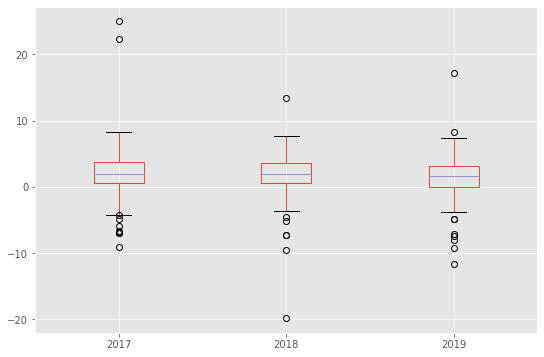

In [5]:
#Se muestran los valores atipicos
#Showing outliers

data.boxplot(column=['2017','2018','2019'])

In [6]:
#Si hubiera algun error y alguna fila estuviera duplicada, la quitamos
#Dropping duplicate rows

data.drop_duplicates()

,Country Name,Country Code,Indicator Name,Indicator Code,2017,2018,2019
1,Africa Eastern and Southern,AFE,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,0.409547,0.002633,-0.570661
2,Afghanistan,AFG,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,0.064764,-1.194900,1.535637
3,Africa Western and Central,AFW,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,-0.429169,0.217701,0.501092
4,Angola,AGO,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,-3.409983,-5.162112,-3.795608
5,Albania,ALB,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,3.897741,4.276326,2.549359
...,...,...,...,...,...,...,...
260,Samoa,WSM,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,0.619350,-1.620922,3.868765
261,Kosovo,XKX,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,4.038709,3.056665,5.237433
263,South Africa,ZAF,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,-0.265301,0.113021,-1.196091
264,Zambia,ZMB,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,0.494086,1.048034,-1.451364


In [7]:
# Se cargan los datos del Indice de Libertad Economica en otro dataframe.
#Loading Freedom Index file on another dataframe.

free_inx_2017 = pd.read_csv("data/freedom_index_2017.csv")

free_inx_2017

,Name,Index Year,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
0,Afghanistan,2017,48.9,12.6,27.5,28.4,91.6,79.9,97.3,54.2,59.9,69.3,66.0,0.0,0.0
1,Albania,2017,64.4,54.0,39.7,28.5,86.9,72.5,51.5,79.3,50.7,81.4,87.7,70.0,70.0
2,Algeria,2017,46.5,38.2,31.7,29.6,81.1,51.0,19.8,62.1,49.5,67.0,63.3,35.0,30.0
3,Angola,2017,48.5,36.4,12.8,19.8,87.7,58.6,70.7,58.5,40.4,70.6,56.7,30.0,40.0
4,Argentina,2017,50.4,32.4,38.2,39.6,62.6,54.6,56.4,57.3,46.1,50.9,66.7,50.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Venezuela,2017,27.0,6.8,11.6,10.3,72.5,51.5,15.2,39.7,28.5,16.8,60.7,0.0,10.0
182,Vietnam,2017,52.4,49.7,24.6,32.0,79.6,74.6,21.1,61.2,62.2,76.0,83.1,25.0,40.0
183,Yemen,2017,NaN,37.3,17.4,22.6,NaN,77.2,10.6,51.4,54.2,59.7,NaN,NaN,NaN
184,Zambia,2017,55.8,49.6,35.0,39.8,73.1,81.6,21.6,66.6,48.2,70.7,78.3,55.0,50.0


In [8]:
#Vemos que no coinciden la cantidad de países. Mostramos las diferencias.
#Countries list don't match. So, we show differences.

ls_data = list(data["Country Name"])
ls_freed = list(free_inx_2017["Name"])


for nombre_freed in ls_freed:
    i = False
    for nombre_data in ls_data:
        if nombre_freed == nombre_data:
            i = True
    if i == False:
        print(nombre_freed)
        

Bangladesh 
Burma
Côte d'Ivoire
Democratic Republic of Congo
Egypt
Eritrea
Hong Kong
Iran
Laos
Liechtenstein
Macau
Micronesia
North Korea
Republic of Congo
Russia
Saint Lucia
Saint Vincent and the Grenadines
São Tomé and Príncipe
Serbia 
South Korea
Syria
Taiwan
The Bahamas
The Gambia
Venezuela
Yemen


In [9]:
# Se reemplazan las inconsistencias
#Replacing values.

free_inx_2017 = free_inx_2017.replace(['Bangladesh '],'Bangladesh')
data = data.replace(['Myanmar'],'Burma')
free_inx_2017 = free_inx_2017.replace(["Côte d'Ivoire"],"Cote d'Ivoire")
data = data.replace(['Congo, Dem. Rep.'],'Democratic Republic of Congo')
data = data.replace(['Egypt, Arab Rep.'],'Egypt')
data = data.replace(['old value'],'new value')
data = data.replace(['Hong Kong SAR, China'],'Hong Kong')
data = data.replace(['Iran, Islamic Rep.'],'Iran')
data = data.replace(['Lao PDR'],'Laos')
data = data.replace(['Macao SAR, China'],'Macau')
data = data.replace(['Micronesia, Fed. Sts.'],'Micronesia')
data = data.replace(['Congo, Rep.'],'Republic of Congo')
data = data.replace(['Russian Federation'],'Russia')
data = data.replace(['St. Lucia'],'Saint Lucia')
data = data.replace(['St. Vincent and the Grenadines'],'Saint Vincent and the Grenadines')
data = data.replace(['Sao Tome and Principe'],'São Tomé and Príncipe')
free_inx_2017 = free_inx_2017.replace(['Serbia '],'Serbia')
data = data.replace(['Korea, Rep.'],'South Korea')
data = data.replace(['Syrian Arab Republic'],'Syria')
data = data.replace(['Bahamas, The'],'The Bahamas')
data = data.replace(['Gambia, The'],'The Gambia')

In [10]:
# Se carga dataset del año 2018
# Loading dataset from 2018

free_inx_2018 = pd.read_csv("data/freedom_index_2018.csv")

# Mostramos las diferencias
# Showing differences

ls_data = list(data["Country Name"])
ls_freed = list(free_inx_2018["Name"])


for nombre_freed in ls_freed:
    i = False
    for nombre_data in ls_data:
        if nombre_freed == nombre_data:
            i = True
    if i == False:
        print(nombre_freed)

Bangladesh 
Côte d'Ivoire
Eritrea
Liechtenstein
North Korea
Serbia 
Taiwan
Venezuela
Yemen


In [11]:
# Se corrigen. Las demas son filas quitadas.
# Correcting them. Others are missing rows.

free_inx_2018 = free_inx_2018.replace(['Bangladesh '],'Bangladesh')
free_inx_2018 = free_inx_2018.replace(["Côte d'Ivoire"],"Cote d'Ivoire")
free_inx_2018 = free_inx_2018.replace(['Serbia '],'Serbia')


# Cargamos dataset del año 2019

free_inx_2019 = pd.read_csv("data/freedom_index_2019.csv")

# Mostramos las diferencias

ls_data = list(data["Country Name"])
ls_freed = list(free_inx_2019["Name"])


for nombre_freed in ls_freed:
    i = False
    for nombre_data in ls_data:
        if nombre_freed == nombre_data:
            i = True
    if i == False:
        print(nombre_freed)

Bangladesh 
Côte d'Ivoire
Eritrea
Liechtenstein
North Korea
Serbia 
Taiwan
Venezuela
Yemen


In [12]:
# Se corrigen. Las demas son filas quitadas.
# Correcting them. Others are missing rows.

free_inx_2019 = free_inx_2019.replace(['Bangladesh '],'Bangladesh')
free_inx_2019 = free_inx_2019.replace(["Côte d'Ivoire"],"Cote d'Ivoire")
free_inx_2019 = free_inx_2019.replace(['Serbia '],'Serbia')

In [13]:
# Se cambian titulos.
# Changing titles.


for col in free_inx_2017.columns:
    if col != 'Name':
        free_inx_2017 = free_inx_2017.rename({col: col + " 2017", }, axis=1)

for col in free_inx_2018.columns:
    if col != "Name":
        free_inx_2018 = free_inx_2018.rename({col: col + " 2018", }, axis=1)

for col in free_inx_2019.columns:
    if col != "Name":
        free_inx_2019 = free_inx_2019.rename({col: col + " 2019", }, axis=1)
    
free_inx_2017

,Name,Index Year 2017,Overall Score 2017,Property Rights 2017,Government Integrity 2017,Judicial Effectiveness 2017,Tax Burden 2017,Government Spending 2017,Fiscal Health 2017,Business Freedom 2017,Labor Freedom 2017,Monetary Freedom 2017,Trade Freedom 2017,Investment Freedom 2017,Financial Freedom 2017
0,Afghanistan,2017,48.9,12.6,27.5,28.4,91.6,79.9,97.3,54.2,59.9,69.3,66.0,0.0,0.0
1,Albania,2017,64.4,54.0,39.7,28.5,86.9,72.5,51.5,79.3,50.7,81.4,87.7,70.0,70.0
2,Algeria,2017,46.5,38.2,31.7,29.6,81.1,51.0,19.8,62.1,49.5,67.0,63.3,35.0,30.0
3,Angola,2017,48.5,36.4,12.8,19.8,87.7,58.6,70.7,58.5,40.4,70.6,56.7,30.0,40.0
4,Argentina,2017,50.4,32.4,38.2,39.6,62.6,54.6,56.4,57.3,46.1,50.9,66.7,50.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Venezuela,2017,27.0,6.8,11.6,10.3,72.5,51.5,15.2,39.7,28.5,16.8,60.7,0.0,10.0
182,Vietnam,2017,52.4,49.7,24.6,32.0,79.6,74.6,21.1,61.2,62.2,76.0,83.1,25.0,40.0
183,Yemen,2017,NaN,37.3,17.4,22.6,NaN,77.2,10.6,51.4,54.2,59.7,NaN,NaN,NaN
184,Zambia,2017,55.8,49.6,35.0,39.8,73.1,81.6,21.6,66.6,48.2,70.7,78.3,55.0,50.0


In [14]:
# Se hace una union entre los dataframes del tipo inner join
# Making an inner join between dataframes

data_amp = pd.merge(left=free_inx_2017,right=free_inx_2018, left_on='Name', right_on='Name')

data_amp = pd.merge(left=data_amp,right=free_inx_2019, left_on='Name', right_on='Name')

data_amp

,Name,Index Year 2017,Overall Score 2017,Property Rights 2017,Government Integrity 2017,Judicial Effectiveness 2017,Tax Burden 2017,Government Spending 2017,Fiscal Health 2017,Business Freedom 2017,...,Judicial Effectiveness 2019,Tax Burden 2019,Government Spending 2019,Fiscal Health 2019,Business Freedom 2019,Labor Freedom 2019,Monetary Freedom 2019,Trade Freedom 2019,Investment Freedom 2019,Financial Freedom 2019
0,Afghanistan,2017,48.9,12.6,27.5,28.4,91.6,79.9,97.3,54.2,...,29.6,91.7,80.3,99.3,49.2,60.4,76.7,66.0,10.0,10.0
1,Albania,2017,64.4,54.0,39.7,28.5,86.9,72.5,51.5,79.3,...,30.6,86.3,73.9,80.6,69.3,52.7,81.5,87.8,70.0,70.0
2,Algeria,2017,46.5,38.2,31.7,29.6,81.1,51.0,19.8,62.1,...,36.2,76.4,48.7,18.7,61.6,49.9,74.9,67.4,30.0,30.0
3,Angola,2017,48.5,36.4,12.8,19.8,87.7,58.6,70.7,58.5,...,26.6,83.9,80.7,58.2,55.7,58.8,55.4,61.2,30.0,40.0
4,Argentina,2017,50.4,32.4,38.2,39.6,62.6,54.6,56.4,57.3,...,44.5,69.3,49.5,33.0,56.4,46.9,60.2,70.0,55.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Venezuela,2017,27.0,6.8,11.6,10.3,72.5,51.5,15.2,39.7,...,13.1,74.7,58.1,17.6,33.9,28.0,0.0,60.0,0.0,10.0
182,Vietnam,2017,52.4,49.7,24.6,32.0,79.6,74.6,21.1,61.2,...,40.3,79.7,74.1,40.7,63.5,62.8,68.9,79.2,30.0,40.0
183,Yemen,2017,NaN,37.3,17.4,22.6,NaN,77.2,10.6,51.4,...,22.2,NaN,83.7,0.0,45.1,49.8,61.5,71.4,50.0,NaN
184,Zambia,2017,55.8,49.6,35.0,39.8,73.1,81.6,21.6,66.6,...,35.6,72.3,80.1,12.3,71.1,46.0,70.3,72.6,55.0,50.0


In [15]:
# Ahora entre el dataframe inicial y el de los indices de libertad economica.
# Now, between GDP variation dataframe and freedom dataframe.

data_amp = pd.merge(left=data,right=data_amp, left_on='Country Name', right_on='Name')

data_amp

,Country Name,Country Code,Indicator Name,Indicator Code,2017,2018,2019,Name,Index Year 2017,Overall Score 2017,...,Judicial Effectiveness 2019,Tax Burden 2019,Government Spending 2019,Fiscal Health 2019,Business Freedom 2019,Labor Freedom 2019,Monetary Freedom 2019,Trade Freedom 2019,Investment Freedom 2019,Financial Freedom 2019
0,Afghanistan,AFG,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,0.064764,-1.194900,1.535637,Afghanistan,2017,48.9,...,29.6,91.7,80.3,99.3,49.2,60.4,76.7,66.0,10.0,10.0
1,Angola,AGO,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,-3.409983,-5.162112,-3.795608,Angola,2017,48.5,...,26.6,83.9,80.7,58.2,55.7,58.8,55.4,61.2,30.0,40.0
2,Albania,ALB,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,3.897741,4.276326,2.549359,Albania,2017,64.4,...,30.6,86.3,73.9,80.6,69.3,52.7,81.5,87.8,70.0,70.0
3,United Arab Emirates,ARE,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,1.011431,-0.320590,1.934431,United Arab Emirates,2017,76.9,...,87.1,99.2,68.8,88.9,79.9,81.1,80.9,84.4,40.0,60.0
4,Argentina,ARG,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,1.757648,-3.601610,-2.994388,Argentina,2017,50.4,...,44.5,69.3,49.5,33.0,56.4,46.9,60.2,70.0,55.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Samoa,WSM,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,0.619350,-1.620922,3.868765,Samoa,2017,58.4,...,31.0,79.9,62.3,93.6,77.0,78.2,83.5,63.8,55.0,30.0
176,Kosovo,XKX,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,4.038709,3.056665,5.237433,Kosovo,2017,67.9,...,53.5,92.5,77.7,96.0,73.8,64.9,78.3,70.8,65.0,30.0
177,South Africa,ZAF,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,-0.265301,0.113021,-1.196091,South Africa,2017,62.3,...,39.3,62.1,67.6,62.6,64.3,59.1,75.2,76.0,45.0,50.0
178,Zambia,ZMB,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,0.494086,1.048034,-1.451364,Zambia,2017,55.8,...,35.6,72.3,80.1,12.3,71.1,46.0,70.3,72.6,55.0,50.0


<AxesSubplot:xlabel='Overall Score 2017', ylabel='2017'>

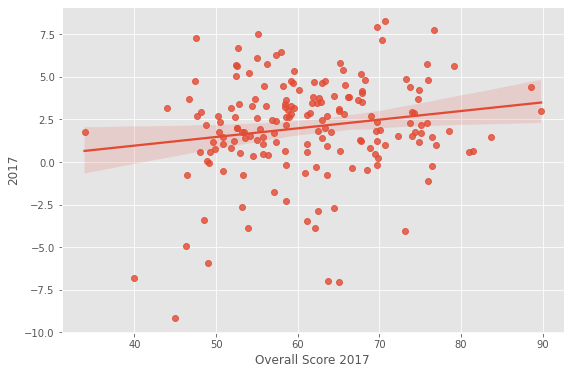

In [16]:
# Se quita la columna Name
# Dropping Name column

data_amp = data_amp.drop(['Name'], axis=1)


# Regresion lineal entre el indice de libertad economica y la varion del PIB en 2017.
# Linear regression between Freedom Index and GDP variation in 2017.

sns.regplot(x="Overall Score 2017", y="2017", data=data_amp)

<AxesSubplot:xlabel='Overall Score 2018', ylabel='2018'>

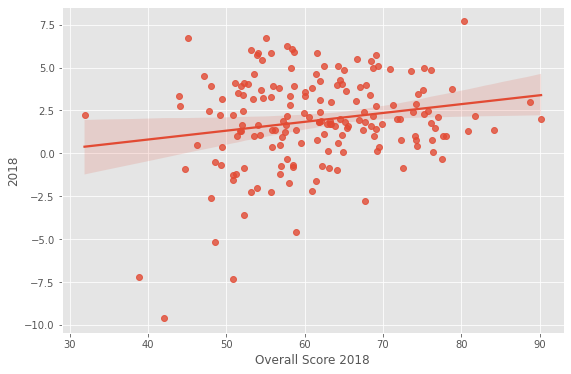

In [17]:
# Regresion lineal entre el indice de libertad economica y la varion del PIB en 2018.
# Linear regression between Freedom Index and GDP variation in 2018.

sns.regplot(x="Overall Score 2018", y="2018", data=data_amp)

<AxesSubplot:xlabel='Overall Score 2019', ylabel='2019'>

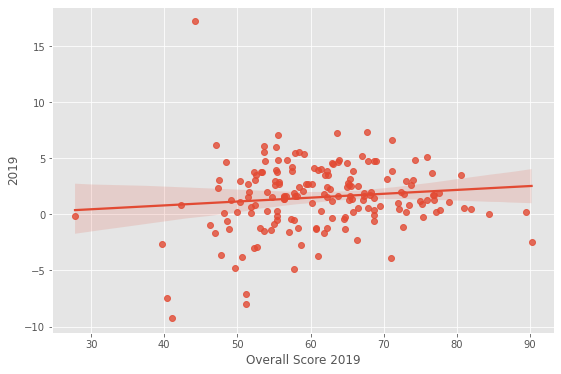

In [18]:
# Regresion lineal entre el indice de libertad economica y la varion del PIB en 2019.
# Linear regression between Freedom Index and GDP variation in 2019.

sns.regplot(x="Overall Score 2019", y="2019", data=data_amp)

In [19]:
# Creamos un nuevo dataframe con solo los datos de la variacion del PIB y el puntaje del freedom index
# Creating a new dataframe with only GDP variation and Freedom index score values.

data_red = data_amp

list_names = ["Country Name", "2017", "2018", "2019", "Overall Score 2017", "Overall Score 2018", "Overall Score 2019"]


for col in data_red.columns:
    if not col in list_names:
        data_red = data_red.drop(col, axis=1)


data_red

,Country Name,2017,2018,2019,Overall Score 2017,Overall Score 2018,Overall Score 2019
0,Afghanistan,0.064764,-1.194900,1.535637,48.9,51.3,51.5
1,Angola,-3.409983,-5.162112,-3.795608,48.5,48.6,50.6
2,Albania,3.897741,4.276326,2.549359,64.4,64.5,66.5
3,United Arab Emirates,1.011431,-0.320590,1.934431,76.9,77.6,77.6
4,Argentina,1.757648,-3.601610,-2.994388,50.4,52.3,52.2
...,...,...,...,...,...,...,...
175,Samoa,0.619350,-1.620922,3.868765,58.4,61.5,62.2
176,Kosovo,4.038709,3.056665,5.237433,67.9,66.6,67.0
177,South Africa,-0.265301,0.113021,-1.196091,62.3,63.0,58.3
178,Zambia,0.494086,1.048034,-1.451364,55.8,54.3,53.6


In [20]:
#Matriz de correlacion bajo el metodo Pearson
#Correlation matrix by Pearson method

data_red.corr(method ='pearson')

,2017,2018,2019,Overall Score 2017,Overall Score 2018,Overall Score 2019
2017,1.000000,0.742970,0.305309,0.170968,0.212032,0.225094
2018,0.742970,1.000000,0.593432,0.173840,0.193495,0.212598
2019,0.305309,0.593432,1.000000,0.072043,0.097176,0.113074
Overall Score 2017,0.170968,0.173840,0.072043,1.000000,0.982392,0.962735
Overall Score 2018,0.212032,0.193495,0.097176,0.982392,1.000000,0.981579
Overall Score 2019,0.225094,0.212598,0.113074,0.962735,0.981579,1.000000


In [21]:
#Matriz de correlacion bajo el metodo Kendall
#Correlation matrix by Kendall method

data_red.corr(method ='kendall')

,2017,2018,2019,Overall Score 2017,Overall Score 2018,Overall Score 2019
2017,1.000000,0.557169,0.374674,0.087624,0.112408,0.127228
2018,0.557169,1.000000,0.531471,0.055619,0.070669,0.092624
2019,0.374674,0.531471,1.000000,0.025045,0.040503,0.065045
Overall Score 2017,0.087624,0.055619,0.025045,1.000000,0.882441,0.827550
Overall Score 2018,0.112408,0.070669,0.040503,0.882441,1.000000,0.890300
Overall Score 2019,0.127228,0.092624,0.065045,0.827550,0.890300,1.000000


In [22]:
#Matriz de correlacion bajo el metodo Spearman
#Correlation matrix by Spearman method

data_red.corr(method ='spearman')

,2017,2018,2019,Overall Score 2017,Overall Score 2018,Overall Score 2019
2017,1.000000,0.737323,0.503079,0.125112,0.165225,0.184841
2018,0.737323,1.000000,0.692032,0.082149,0.102923,0.139811
2019,0.503079,0.692032,1.000000,0.045552,0.070742,0.105288
Overall Score 2017,0.125112,0.082149,0.045552,1.000000,0.977678,0.952092
Overall Score 2018,0.165225,0.102923,0.070742,0.977678,1.000000,0.975352
Overall Score 2019,0.184841,0.139811,0.105288,0.952092,0.975352,1.000000


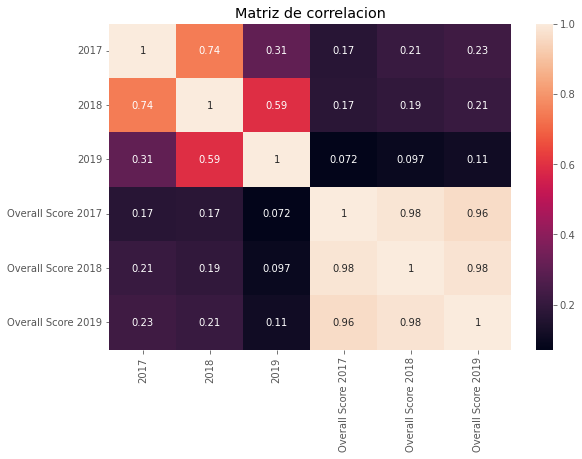

In [23]:
# Matriz de correlacion con grado de colores
# Correlation Matrix with colors

correlation_matrix = data_red.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Matriz de correlacion")

plt.show()

In [24]:
#Se generan los pares de correlacion
#Generation correlation pairs

correlation_matrix = data_amp.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_matrix.unstack()

corr_pairs = corr_pairs.dropna()

print(corr_pairs)


#Se ordenan
#Sorting them

sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

Country Name            Country Name               1.000000
                        Country Code               1.000000
                        2017                       1.000000
                        2018                       1.000000
                        2019                       1.000000
                                                     ...   
Financial Freedom 2019  Labor Freedom 2019         0.107205
                        Monetary Freedom 2019      0.029406
                        Trade Freedom 2019         0.132610
                        Investment Freedom 2019    0.111259
                        Financial Freedom 2019     1.000000
Length: 1936, dtype: float64
Government Integrity 2019  Financial Freedom 2017      -0.146925
Financial Freedom 2017     Government Integrity 2019   -0.146925
Investment Freedom 2019    Government Integrity 2019   -0.084231
Government Integrity 2019  Investment Freedom 2019     -0.084231
Fiscal Health 2018         Financial Freedom 2018  

In [25]:
# Se buscan las altas correlaciones (> 0.5)
#Searching high correlations (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
strong_pairs = strong_pairs[abs(sorted_pairs) < 1]

print(strong_pairs)

Tax Burden 2019         Trade Freedom 2019        0.500294
Trade Freedom 2019      Tax Burden 2019           0.500294
Overall Score 2019      Trade Freedom 2018        0.500914
Trade Freedom 2018      Overall Score 2019        0.500914
Labor Freedom 2018      Property Rights 2019      0.501010
                                                    ...   
2017                    Business Freedom 2019     0.901324
Country Name            Business Freedom 2019     0.901324
Country Code            Business Freedom 2019     0.901324
Financial Freedom 2019  Financial Freedom 2018    0.974524
Financial Freedom 2018  Financial Freedom 2019    0.974524
Length: 1158, dtype: float64


In [26]:
# se crean dos nuevas columnas con la media de cada indicador
# Creating two new columns with each indicator mean.

data_red_new = data_red

data_red_new["Average Freedom"] = (data_red_new["Overall Score 2017"] + data_red_new["Overall Score 2018"] + data_red_new["Overall Score 2019"]) / 3

data_red_new["Average GDP Variation"] = (data_red_new["2017"] + data_red_new["2018"] + data_red_new["2019"]) / 3

data_red_new

,Country Name,2017,2018,2019,Overall Score 2017,Overall Score 2018,Overall Score 2019,Average Freedom,Average GDP Variation
0,Afghanistan,0.064764,-1.194900,1.535637,48.9,51.3,51.5,50.566667,0.135167
1,Angola,-3.409983,-5.162112,-3.795608,48.5,48.6,50.6,49.233333,-4.122568
2,Albania,3.897741,4.276326,2.549359,64.4,64.5,66.5,65.133333,3.574475
3,United Arab Emirates,1.011431,-0.320590,1.934431,76.9,77.6,77.6,77.366667,0.875091
4,Argentina,1.757648,-3.601610,-2.994388,50.4,52.3,52.2,51.633333,-1.612783
...,...,...,...,...,...,...,...,...,...
175,Samoa,0.619350,-1.620922,3.868765,58.4,61.5,62.2,60.700000,0.955731
176,Kosovo,4.038709,3.056665,5.237433,67.9,66.6,67.0,67.166667,4.110936
177,South Africa,-0.265301,0.113021,-1.196091,62.3,63.0,58.3,61.200000,-0.449457
178,Zambia,0.494086,1.048034,-1.451364,55.8,54.3,53.6,54.566667,0.030252


In [27]:
# Los 10 paises con mayor crecimiento medio del PIB
# 10 first countries with higher GDP growth

CountryHigherPIB = data_red_new.groupby('Country Name')[["Average GDP Variation"]].sum()

CountryHigherPIB = CountryHigherPIB.sort_values('Average GDP Variation', ascending = False)[:10]

CountryHigherPIB = CountryHigherPIB['Average GDP Variation']

CountryHigherPIB

Country Name
Libya         13.154001
Bangladesh     6.638355
Armenia        6.506317
Ireland        6.313363
China          6.042699
Nepal          6.038084
Moldova        5.984097
Romania        5.923419
Vietnam        5.915174
Burma          5.641989
Name: Average GDP Variation, dtype: float64

In [28]:
# Los 10 paises con mayor media de libertad economica
# 10 first countries with higher Freedom mean

CountryHigherFreedom = data_red_new.groupby('Country Name')[["Average Freedom"]].sum()

CountryHigherFreedom = CountryHigherFreedom.sort_values('Average Freedom', ascending = False)[:10]

CountryHigherFreedom = CountryHigherFreedom['Average Freedom']

CountryHigherFreedom

Country Name
Hong Kong               90.066667
Singapore               88.933333
New Zealand             84.100000
Switzerland             81.700000
Australia               80.933333
Ireland                 79.200000
Estonia                 78.166667
Canada                  77.966667
United Kingdom          77.766667
United Arab Emirates    77.366667
Name: Average Freedom, dtype: float64

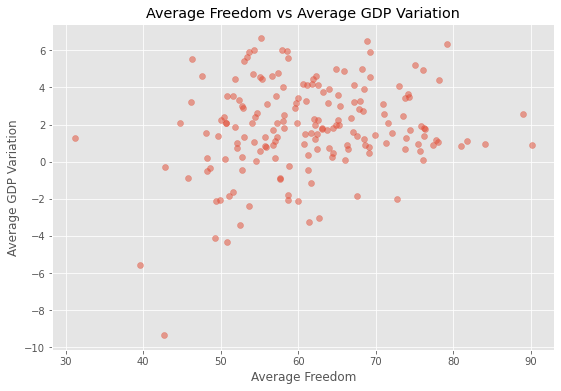

In [29]:
# Media de libertad economica vs media de la variacion el PIB
# Average Freedom vs Average GDP Variation

plt.scatter(x=data_red_new['Average Freedom'], y=data_red_new['Average GDP Variation'], alpha=0.5)
plt.title('Average Freedom vs Average GDP Variation')
plt.xlabel('Average Freedom')
plt.ylabel('Average GDP Variation')
plt.show()

<AxesSubplot:>

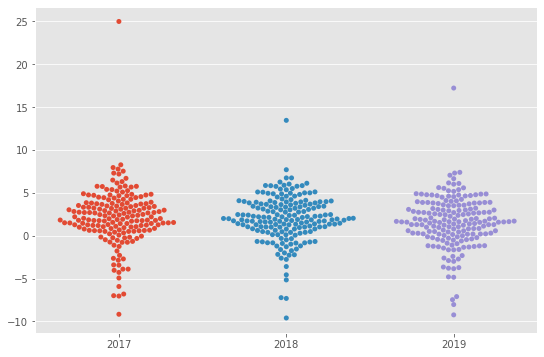

In [30]:
# Variacion del PIB por año.
# GDP variation per year.

sns.swarmplot(data=data_red_new[["2017", "2018", "2019"]])

<AxesSubplot:>

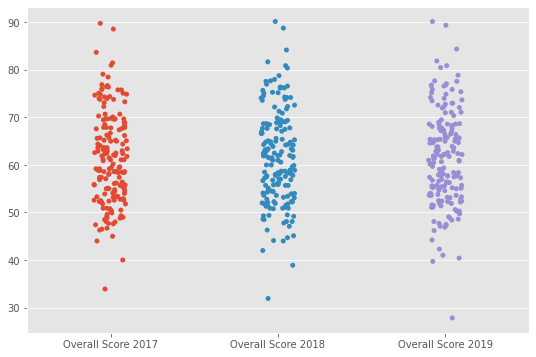

In [31]:
# Indice de libertad economica
# Freedom Index

sns.stripplot(data=data_red_new[["Overall Score 2017", "Overall Score 2018", "Overall Score 2019"]])